In [131]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from datetime import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [132]:
warnings.filterwarnings('ignore')

In [133]:
data = pd.read_csv("/content/BPCL.csv")
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BPCL,EQ,381.20,405.00,407.00,393.05,397.75,399.25,399.32,8720,3.482029e+11,NaN,NaN,NaN
1,2000-01-04,BPCL,EQ,399.25,397.75,397.75,367.40,377.45,370.50,375.71,22820,8.573699e+11,NaN,NaN,NaN
2,2000-01-05,BPCL,EQ,370.50,350.00,385.00,350.00,360.10,359.95,359.96,152538,5.490785e+12,NaN,NaN,NaN
3,2000-01-06,BPCL,EQ,359.95,362.00,384.00,362.00,381.65,380.30,380.10,59554,2.263623e+12,NaN,NaN,NaN
4,2000-01-07,BPCL,EQ,380.30,369.00,390.00,366.00,381.50,379.85,378.33,43187,1.633890e+12,NaN,NaN,NaN


In [134]:
data.drop(['Date'], axis=1, inplace=True)

In [135]:
print(data.head())
print(data.shape)
print(data.columns)

  Symbol Series  Prev Close    Open    High     Low    Last   Close    VWAP  \
0   BPCL     EQ      381.20  405.00  407.00  393.05  397.75  399.25  399.32   
1   BPCL     EQ      399.25  397.75  397.75  367.40  377.45  370.50  375.71   
2   BPCL     EQ      370.50  350.00  385.00  350.00  360.10  359.95  359.96   
3   BPCL     EQ      359.95  362.00  384.00  362.00  381.65  380.30  380.10   
4   BPCL     EQ      380.30  369.00  390.00  366.00  381.50  379.85  378.33   

   Volume      Turnover  Trades  Deliverable Volume  %Deliverble  
0    8720  3.482029e+11     NaN                 NaN          NaN  
1   22820  8.573699e+11     NaN                 NaN          NaN  
2  152538  5.490785e+12     NaN                 NaN          NaN  
3   59554  2.263623e+12     NaN                 NaN          NaN  
4   43187  1.633890e+12     NaN                 NaN          NaN  
(5306, 14)
Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turno

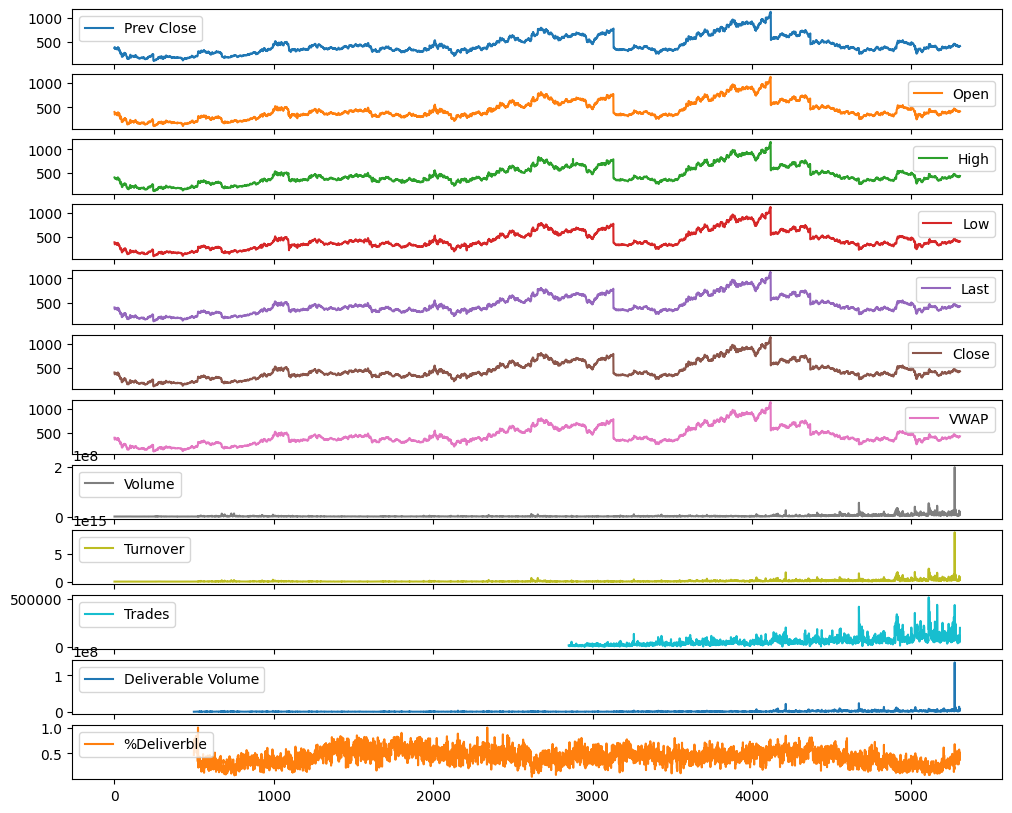

Symbol                   1
Series                   1
Prev Close            4121
Open                  2884
High                  3456
Low                   3559
Last                  3501
Close                 4121
VWAP                  5049
Volume                5298
Turnover              5306
Trades                2431
Deliverable Volume    4794
%Deliverble           3254
dtype: int64

In [136]:
data.plot(legend=True,subplots=True, figsize = (12, 10))
plt.show()
#data['Close'].plot(legend=True, figsize = (12, 6))
#plt.show()
#data['Volume'].plot(legend=True,figsize=(12,7))
#plt.show()

data.shape
data.size
data.describe(include='all').T
data.dtypes
data.nunique()


In [137]:
data.reset_index(drop=True, inplace=True)
#data.fillna(data.mean(), inplace=True)
data.head()


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,BPCL,EQ,381.20,405.00,407.00,393.05,397.75,399.25,399.32,8720,3.482029e+11,NaN,NaN,NaN
1,BPCL,EQ,399.25,397.75,397.75,367.40,377.45,370.50,375.71,22820,8.573699e+11,NaN,NaN,NaN
2,BPCL,EQ,370.50,350.00,385.00,350.00,360.10,359.95,359.96,152538,5.490785e+12,NaN,NaN,NaN
3,BPCL,EQ,359.95,362.00,384.00,362.00,381.65,380.30,380.10,59554,2.263623e+12,NaN,NaN,NaN
4,BPCL,EQ,380.30,369.00,390.00,366.00,381.50,379.85,378.33,43187,1.633890e+12,NaN,NaN,NaN


     Symbol Series  Prev Close    Open    High     Low    Last   Close  \
0      BPCL     EQ      381.20  405.00  407.00  393.05  397.75  399.25   
1      BPCL     EQ      399.25  397.75  397.75  367.40  377.45  370.50   
2      BPCL     EQ      370.50  350.00  385.00  350.00  360.10  359.95   
3      BPCL     EQ      359.95  362.00  384.00  362.00  381.65  380.30   
4      BPCL     EQ      380.30  369.00  390.00  366.00  381.50  379.85   
...     ...    ...         ...     ...     ...     ...     ...     ...   
5301   BPCL     EQ      423.05  426.00  428.35  417.55  417.60  418.90   
5302   BPCL     EQ      418.90  417.50  423.10  416.55  420.00  420.35   
5303   BPCL     EQ      420.35  422.00  424.35  414.90  417.15  417.50   
5304   BPCL     EQ      417.50  422.00  423.00  417.00  419.00  419.55   
5305   BPCL     EQ      419.55  417.50  437.50  414.65  422.10  421.80   

        VWAP    Volume      Turnover    Trades  Deliverable Volume  \
0     399.32      8720  3.482029e+11     

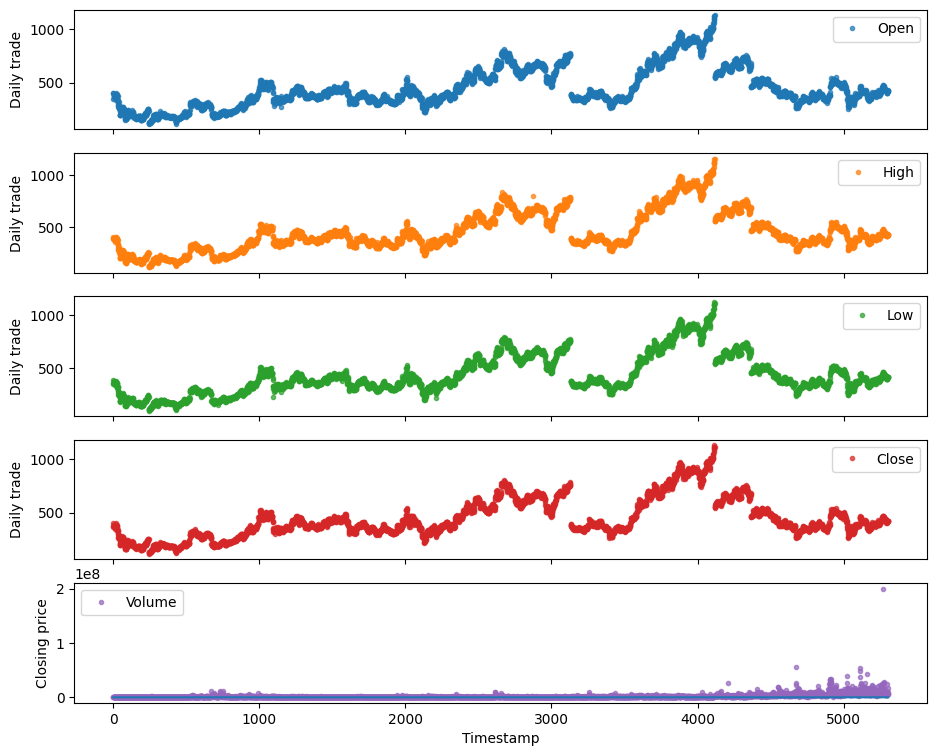

In [138]:

data.nunique()

data.sort_index(axis=1,ascending=True)

cols_plot = ['Open', 'High', 'Low','Close','Volume']
axes = data[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)



In [139]:
data.isnull().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     509
%Deliverble            509
dtype: int64

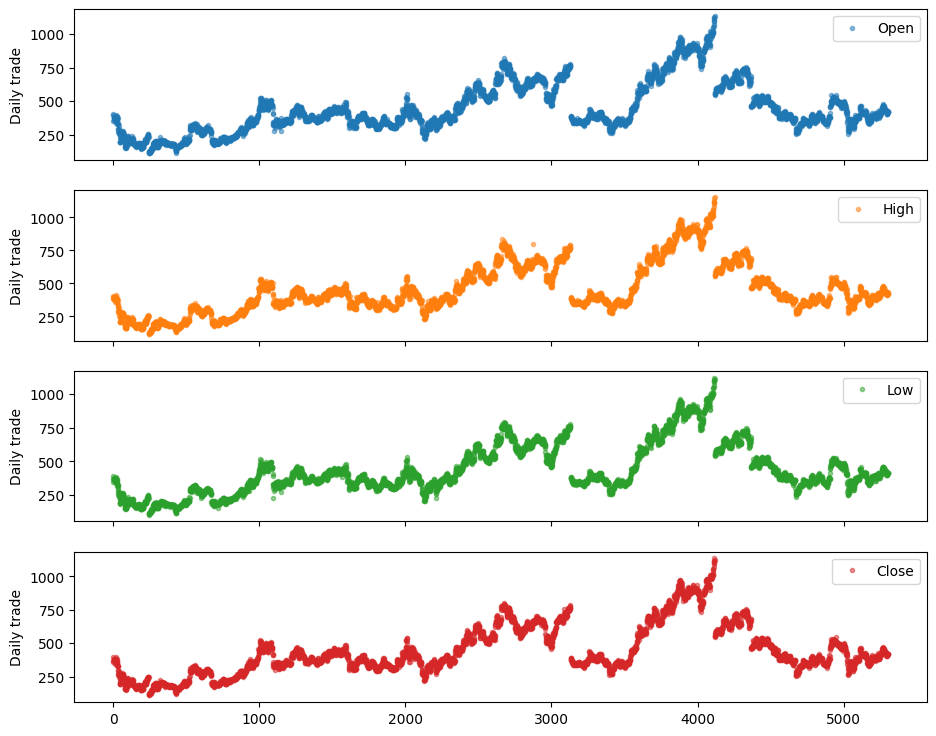

In [140]:
cols_plot = ['Open', 'High', 'Low','Close']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

     Symbol Series  Prev Close    Open    High     Low    Last   Close  \
0      BPCL     EQ      381.20  405.00  407.00  393.05  397.75  399.25   
1      BPCL     EQ      399.25  397.75  397.75  367.40  377.45  370.50   
2      BPCL     EQ      370.50  350.00  385.00  350.00  360.10  359.95   
3      BPCL     EQ      359.95  362.00  384.00  362.00  381.65  380.30   
4      BPCL     EQ      380.30  369.00  390.00  366.00  381.50  379.85   
...     ...    ...         ...     ...     ...     ...     ...     ...   
5301   BPCL     EQ      423.05  426.00  428.35  417.55  417.60  418.90   
5302   BPCL     EQ      418.90  417.50  423.10  416.55  420.00  420.35   
5303   BPCL     EQ      420.35  422.00  424.35  414.90  417.15  417.50   
5304   BPCL     EQ      417.50  422.00  423.00  417.00  419.00  419.55   
5305   BPCL     EQ      419.55  417.50  437.50  414.65  422.10  421.80   

        VWAP    Volume      Turnover    Trades  Deliverable Volume  \
0     399.32      8720  3.482029e+11     

,count,mean,std,min,25%,50%,75%,max
Prev Close,5306.0,4.443700e+02,1.843403e+02,1.101500e+02,3.338375e+02,3.934000e+02,5.551250e+02,1.133300e+03
Open,5306.0,4.450142e+02,1.844912e+02,1.139000e+02,3.340000e+02,3.940750e+02,5.557500e+02,1.132200e+03
High,5306.0,4.529357e+02,1.863738e+02,1.175000e+02,3.410000e+02,4.008250e+02,5.649750e+02,1.156000e+03
Low,5306.0,4.366300e+02,1.827066e+02,1.062500e+02,3.263875e+02,3.853500e+02,5.449875e+02,1.120100e+03
Last,5306.0,4.443841e+02,1.843528e+02,1.100000e+02,3.340125e+02,3.931000e+02,5.549375e+02,1.132100e+03
Close,5306.0,4.443776e+02,1.843386e+02,1.101500e+02,3.338375e+02,3.935500e+02,5.551250e+02,1.133300e+03
VWAP,5306.0,4.448023e+02,1.845374e+02,1.141300e+02,3.337150e+02,3.926800e+02,5.545900e+02,1.137040e+03
Volume,5306.0,2.093650e+06,4.462703e+06,2.297000e+03,4.136565e+05,8.820490e+05,2.040695e+06,1.997910e+08
Turnover,5306.0,9.323829e+13,1.927900e+14,6.755889e+10,1.647654e+13,3.808395e+13,1.140152e+14,8.810053e+15
Trades,2456.0,5.572556e+04,4.765611e+04,4.270000e+02,2.450975e+04,4.515850e+04,7.188175e+04,5.117900e+05


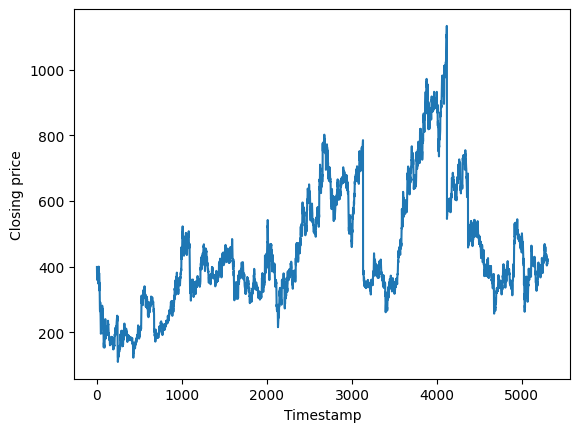

In [141]:
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

df.describe().transpose()

In [142]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

4163
1041


In [143]:
import keras
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten

#LSTM Model

lstm_1 = keras.layers.LSTM(16, activation='tanh', return_sequences=True, input_shape=(train_X.shape[1],100 ))

# Create the second LSTM layer
lstm_2 = keras.layers.LSTM(32, activation='tanh')


# Create the output layer
dense_layer = keras.layers.Dense(64, activation='relu')

# Stack the LSTM layers
model = keras.Sequential([lstm_1, lstm_2, dense_layer])



#DNN Model
model.add(Dense(64))
model.add(Activation('relu'))

###2nd layer
model.add(Dense(64))
model.add(Activation('relu'))

###3rd layer
model.add(Dense(64))
model.add(Activation('relu'))


model.add(Flatten())
#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=100,batch_size=64, verbose=1, shuffle =False)

Epoch 1/100
66/66 [==============================] - 4s 13ms/step - loss: 0.0222 - mse: 0.0222 - mae: 0.1028 - val_loss: 0.0059 - val_mse: 0.0059 - val_mae: 0.0530
Epoch 2/100
66/66 [==============================] - 0s 3ms/step - loss: 0.0039 - mse: 0.0039 - mae: 0.0432 - val_loss: 0.0032 - val_mse: 0.0032 - val_mae: 0.0379
Epoch 3/100
66/66 [==============================] - 0s 3ms/step - loss: 0.0027 - mse: 0.0027 - mae: 0.0352 - val_loss: 0.0023 - val_mse: 0.0023 - val_mae: 0.0323
Epoch 4/100
66/66 [==============================] - 0s 4ms/step - loss: 0.0022 - mse: 0.0022 - mae: 0.0322 - val_loss: 0.0020 - val_mse: 0.0020 - val_mae: 0.0294
Epoch 5/100
66/66 [==============================] - 0s 4ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0302 - val_loss: 0.0018 - val_mse: 0.0018 - val_mae: 0.0282
Epoch 6/100
66/66 [==============================] - 0s 4ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0288 - val_loss: 0.0016 - val_mse: 0.0016 - val_mae: 0.0273
Epoch 7/100
66/66 [==

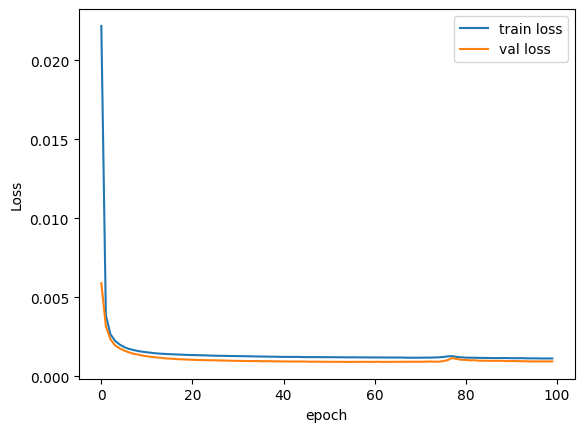

In [144]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

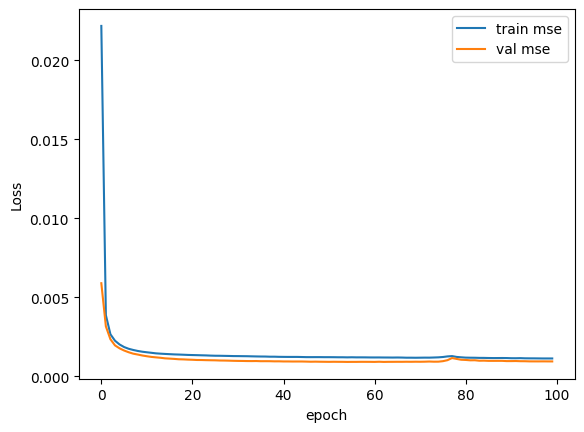

In [145]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

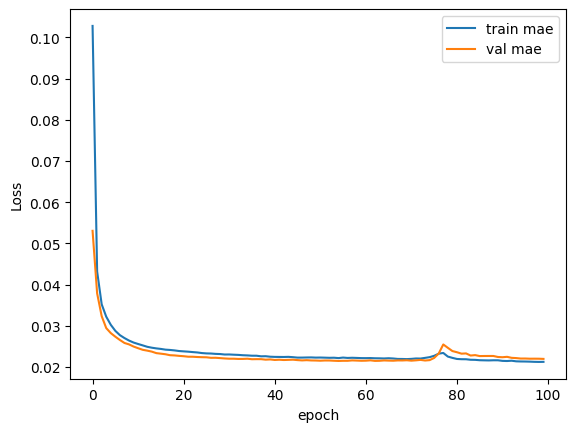

In [146]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 1, 16)             7488      
                                                                 
 lstm_11 (LSTM)              (None, 32)                6272      
                                                                 
 dense_25 (Dense)            (None, 64)                2112      
                                                                 
 dense_26 (Dense)            (None, 64)                4160      
                                                                 
 activation_15 (Activation)  (None, 64)                0         
                                                                 
 dense_27 (Dense)            (None, 64)                4160      
                                                                 
 activation_16 (Activation)  (None, 64)               

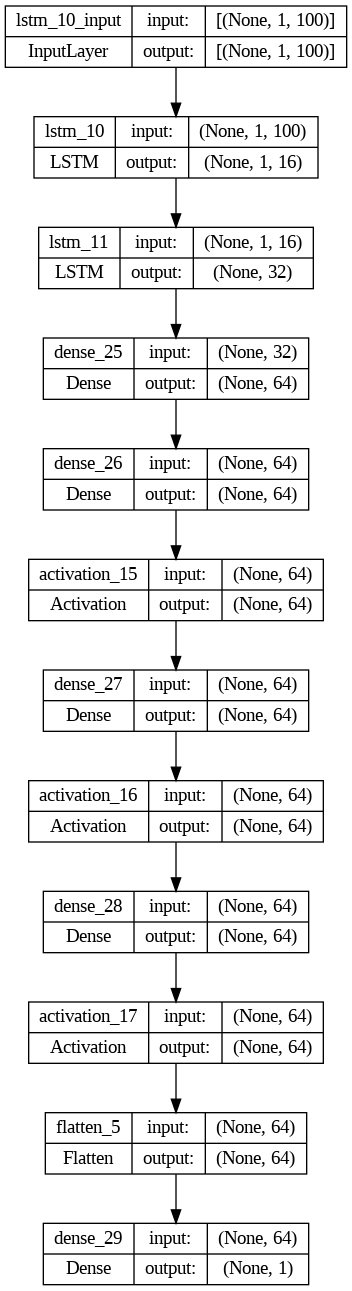

In [147]:
# After the model has been constructed, we'll summarise it
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

The Value used in Table for performance is from here

In [148]:
model.evaluate(test_X, test_Y)

33/33 [==============================] - 0s 1ms/step - loss: 9.3694e-04 - mse: 9.3694e-04 - mae: 0.0220


[0.0009369389154016972, 0.0009369389154016972, 0.02195543609559536]

In [149]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % r2)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.985794
R2 Score: 0.985405
Max Error: 0.198234


33/33 [==============================] - 0s 1ms/step


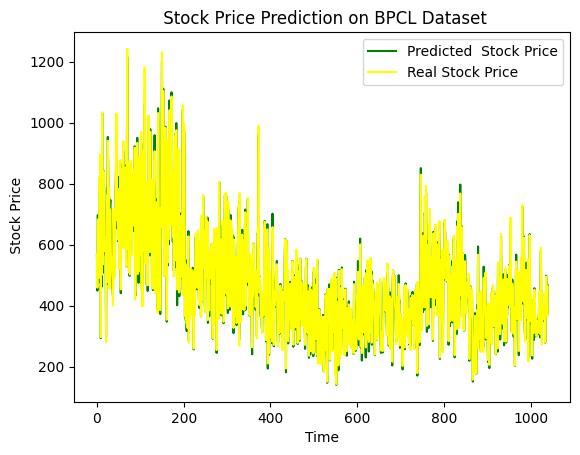

In [150]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'yellow', label = 'Real Stock Price')
plt.title(' Stock Price Prediction on Britannia Dataset')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

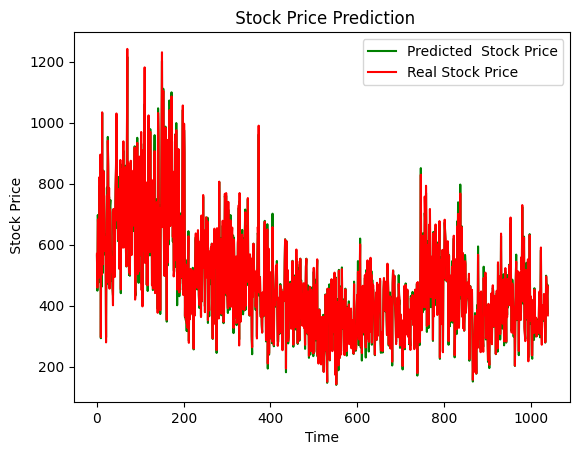

In [151]:
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [152]:
predicted

array([[564.2176 ],
       [448.69458],
       [696.7561 ],
       ...,
       [433.41492],
       [468.1422 ],
       [374.43243]], dtype=float32)

In [153]:
test_label

array([[569.39450687],
       [458.68319016],
       [681.90794224],
       ...,
       [435.94205784],
       [464.4594578 ],
       [367.68333936]])

In [154]:
# Flatten the arrays
predicted_flat = [val[0] for val in predicted]
test_label_flat = [val[0] for val in test_label]

# Create a DataFrame
res = pd.DataFrame({

    'Actual Price': test_label_flat,
    'Predicted Price': predicted_flat,
})

# Display the DataFrame
print(res)

      Actual Price  Predicted Price
0       569.394507       564.217590
1       458.683190       448.694580
2       681.907942       696.756104
3       680.780338       649.469971
4       490.547580       475.951080
...            ...              ...
1036    495.270029       497.775604
1037    460.263486       464.261139
1038    435.942058       433.414917
1039    464.459458       468.142212
1040    367.683339       374.432434

[1041 rows x 2 columns]


In [155]:
from tabulate import tabulate
table = tabulate(res, headers='keys', tablefmt='pretty')
print(table)

+------+--------------------+--------------------+
|      |    Actual Price    |  Predicted Price   |
+------+--------------------+--------------------+
|  0   |  569.394506866417  | 564.2175903320312  |
|  1   | 458.68319015556074 |  448.694580078125  |
|  2   | 681.9079422382671  |  696.756103515625  |
|  3   | 680.7803381340013  |  649.469970703125  |
|  4   | 490.54757996378993 | 475.9510803222656  |
|  5   | 620.0738234389418  | 626.1154174804688  |
|  6   | 821.5228575442541  | 793.1137084960938  |
|  7   | 675.2865379794434  |  684.57861328125   |
|  8   | 894.8808390360011  | 865.0883178710938  |
|  9   | 295.9622641509434  | 292.81854248046875 |
|  10  | 776.5831480108723  |  774.195068359375  |
|  11  |  500.997616038603  | 461.8769836425781  |
|  12  | 1033.4587654664258 | 1031.8184814453125 |
|  13  | 533.9788553508429  | 506.11871337890625 |
|  14  |  769.408897370653  | 763.8092041015625  |
|  15  | 840.1320302415638  | 842.0005493164062  |
|  16  | 809.5612091938708  | 8

In [156]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 1, 16)             7488      
                                                                 
 lstm_11 (LSTM)              (None, 32)                6272      
                                                                 
 dense_25 (Dense)            (None, 64)                2112      
                                                                 
 dense_26 (Dense)            (None, 64)                4160      
                                                                 
 activation_15 (Activation)  (None, 64)                0         
                                                                 
 dense_27 (Dense)            (None, 64)                4160      
                                                                 
 activation_16 (Activation)  (None, 64)               

In [157]:
#from sklearn.metrics import accuracy_score

#accuracy = accuracy_score(test_Y, yhat_probs)
#print('Accuracy: {:.2f}'.format(accuracy))